In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_files(root, num):
  xtilda =  []
  labels = []
  label = 0
  for i in range(1, (num*10)+1):
    pixels = plt.imread(root+str(i)+'.jpg')
    pixels = np.append(pixels, 1)
    xtilda.append(pixels)
    
    # Add labels according to the filename
    if(i%num == 0):
      label = (i//num)-1
    else:
      label = i//num

    labels.append(label)


  xtilda = np.array(xtilda)  
  labels = np.array(labels)
  return xtilda, labels

In [3]:
def target_values(labels):
  t0=np.ones(labels.size)*-1
  t1=np.ones(labels.size)*-1
  t2=np.ones(labels.size)*-1
  t3=np.ones(labels.size)*-1
  t4=np.ones(labels.size)*-1
  t5=np.ones(labels.size)*-1
  t6=np.ones(labels.size)*-1
  t7=np.ones(labels.size)*-1
  t8=np.ones(labels.size)*-1
  t9=np.ones(labels.size)*-1
  
  for i in range(0, labels.size):
    if labels[i]==0:
      t0[i]=1
    elif labels[i]==1:
      t1[i]=1
    elif labels[i]==2:
      t2[i]=1
    elif labels[i]==3:
      t3[i]=1
    elif labels[i]==4:
      t4[i]=1
    elif labels[i]==5:
      t5[i]=1
    elif labels[i]==6:
      t6[i]=1
    elif labels[i]==7:
      t7[i]=1
    elif labels[i]==8:
      t8[i]=1
    elif labels[i]==9:
      t9[i]=1
  
  return t0, t1, t2, t3, t4, t5, t6, t7, t8, t9
  

In [4]:
def get_w(xtilda, t):
  s1 = np.dot(xtilda.transpose(), xtilda)
  s2 =  np.linalg.pinv(s1)
  s3 = np.dot(s2, xtilda.transpose())
  w = np.dot(s3, t)
  return w

In [6]:
xtilda, labels = parse_files('C:\\Users\\Sarah\\Desktop\\Assignment1 ML\\Train\\', 240)
t0, t1, t2, t3, t4, t5, t6, t7, t8, t9 = target_values(labels)

w0 = get_w(xtilda, t0)
w1 = get_w(xtilda, t1)
w2 = get_w(xtilda, t2)
w3 = get_w(xtilda, t3)
w4 = get_w(xtilda, t4)
w5 = get_w(xtilda, t5)
w6 = get_w(xtilda, t6)
w7 = get_w(xtilda, t7)
w8 = get_w(xtilda, t8)
w9 = get_w(xtilda, t9)

**Test**

In [7]:
def classify(xtilda, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9):
  labels =[]
  for i in xtilda:
    l0 = np.dot(w0.transpose(), i)
    l1 = np.dot(w1.transpose(), i)
    l2 = np.dot(w2.transpose(), i)
    l3 = np.dot(w3.transpose(), i)
    l4 = np.dot(w4.transpose(), i)
    l5 = np.dot(w5.transpose(), i)
    l6 = np.dot(w6.transpose(), i)
    l7 = np.dot(w7.transpose(), i)
    l8 = np.dot(w8.transpose(), i)
    l9 = np.dot(w9.transpose(), i)
    
    values = [l0, l1, l2, l3, l4, l5, l6, l7, l8, l9]
    label = values.index(max(values))
    labels.append(label)
  labels = np.array(labels)
  return labels

In [8]:
def get_cm(true, predicted):
  n = np.unique(true).size
  cm = np.zeros(n*n).reshape(n, n)
  for i in range(0, true.size):
    cm[true[i]][predicted[i]]+=1
    
  cm = cm.astype(int)
  return cm

In [9]:
def plot_cm(cm, classes):

  fig, ax = plt.subplots(figsize=(10,10))
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
         yticks=np.arange(cm.shape[0]),
         # ... and label them with the respective list entries
         xticklabels=classes, yticklabels=classes,
         title= 'confusion matrix',
         ylabel='True label',
         xlabel='Predicted label')
  ax.set_ylim(len(cm)-0.5, -0.5)

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
           rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], 'd'),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  plt.savefig('Confusion.jpg')
  

In [10]:
x_test, true_labels = parse_files('C:\\Users\\Sarah\\Desktop\\Assignment1 ML\\Test\\', 20)
classified_labels = classify(x_test, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9)

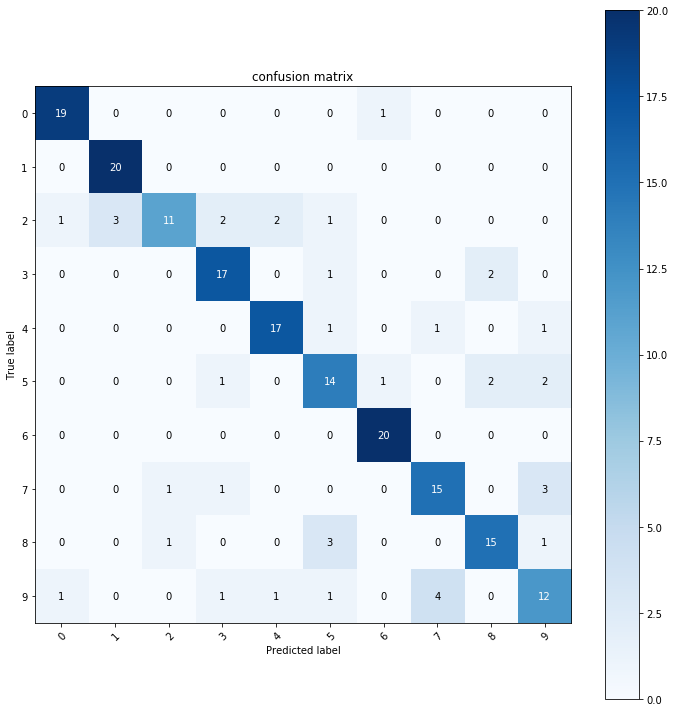

In [11]:
cm = get_cm(true_labels, classified_labels)
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plot_cm(cm, classes)